<h1 style="text-align:center;;font-weight:bold"><i>Recommending a Businessin Pune, India</i></h1>
<h3 style="text-align:center">Vijay Kumar, Jan 30,2021</h3>

<img src="https://www.mittalbuilders.com/blog/wp-content/uploads/2020/06/Reasons-to-settle-down-in-Pune.png" width="100%" height="20%"/>

## 1.1 Business Problem
<p>
    Aperson or businessman searches for a venue in a new city or want to open a new business, they’re highly interested in the best places that the city has to offer. The person might want to know what kind of business theycan start in a particular areaor what are the most common and best business present ina location. If theyknow this valuableinformation then it certainly would help decide which business to open in a neighbourhoodaround the city.Pune is known for its educational facilities, having more than hundred educational institutes and nine universities. Pune has well-established glass, sugar and metal forging industries since the 1950s. Pune is also home to numerous small and medium-sized enterprises. Pune Infotech Park has emerged as the leading IT centre in not just Pune, but the entire country. Pune is also emerging as a prominent city for Business Process Outsourcing (BPO) companies. Today, Pune has many complexes, shopping malls, restaurant and multiplexes, if you are the person thinking of opening a business then Pune will be the right place.
    <hp>

## 1.2 Interested audience
<p>Anyonewho is thinking to open a business or wants to explore the business can use this project, it would certainly help him to find the best businessoptionor even the best venues.</p>

## 2. ***Data Gathering and Cleaning***

In [1]:
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import pandas as pd

### 2.1 ***Scrapping the data***
<p> I'll be using the beautifulSoup to extract the Neighborhoods of Pune</p>

In [2]:
url="https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Pune"
n=requests.get(url)
scrap=BeautifulSoup(n.text,"lxml")  # will return all html code of that page

uts=scrap.select("li") # extracting the <li> attribute
pune_neighborhod=[]
for i in range(len(uts)):
    pune_neighborhod.append(uts[i].getText())  # extracting the text inside of li tag
    
pune_neighborhod=pune_neighborhod[1:-47] # store only starting from 1 except last 47 
# making a dataframe 
df=pd.DataFrame(pune_neighborhod,columns=['Neighbourhood']) # will craete a index column so we have to drop it
df=df.drop([0],axis=0) # dropping the index column
df.head()

Neighbourhood
1         Aundh, Pune
2            Balewadi
3               Baner
4             Bavdhan
5  Bhavani Peth, Pune

### 2.2 ***Cleaning the data***

<p>As we can see there are some unwanted text in data ,so we have to remove that then I'll use split method to split the city name and storing the result in Neighbourhoods column </p>

In [3]:
df.drop([25,39],axis=0,inplace=True)
df=df.reset_index().drop(['index'],axis=1)
df.head()

Neighbourhood
0         Aundh, Pune
1            Balewadi
2               Baner
3             Bavdhan
4  Bhavani Peth, Pune

### Now we have to remove city name from the column

In [4]:
df['Neighbourhood']=df['Neighbourhood'].str.split(",").str[0]
df.head()

Neighbourhood
0         Aundh
1      Balewadi
2         Baner
3       Bavdhan
4  Bhavani Peth

### Get the cordinates of all Neighborhoods

<p>I will geopy library to get the cordinates.</p>
<p> Let's craete a dataframe in which we will append all the cordinates</p>

In [5]:
column_names = ['Neighbourhoods', 'Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

#filtering the neighborhod for which geopy library can not able to find the cordinates
from geopy.geocoders import Nominatim 
n_name=[]  # will be used store the name for which we are getting the cordinates
for name,index in zip(df['Neighbourhood'],df['Neighbourhood'].index):
        try:
            print('------'+name+'------')
            address='{},IN'.format(name)
            gelocator=Nominatim(user_agent="Pune Explorers")
            location=gelocator.geocode(address)
            lat=location.latitude
            lon=location.longitude
            
            #neighborhoods=neighborhoods.append({'Neighborhood':name,'Latitude':lat,'Longitude':lon},ignore_index=True)
            print('Cordinates are {},{}'.format(lat,lon))
            print()
            n_name.append(name)
        except Exception as e:
            print('Sorry!!')
            print(name)

------Aundh------
Cordinates are 18.5618834,73.8101957

------Balewadi------
Cordinates are 18.5820266,73.7689831

------Baner------
Cordinates are 19.5322824,82.8086975

------Bavdhan------
Cordinates are 18.5209541,73.7780873

------Bhavani Peth------
Cordinates are 17.68993685,75.90552390036864

------Blue Ridge Town Pune------
Sorry!!
Blue Ridge Town Pune
------Budhwar Peth------
Cordinates are 18.5175599,73.858037

------Chakan------
Cordinates are 25.7831685,76.2848274

------Dapodi------
Cordinates are 18.580845699999998,73.83277484526513

------Deccan Gymkhana------
Cordinates are 18.5158926,73.84116

------Dhankawadi------
Cordinates are 29.8758368,77.8899364

------Dhayari------
Cordinates are 18.4373984,73.8190432

------Erandwane------
Sorry!!
Erandwane
------Fatimanagar------
Sorry!!
Fatimanagar
------Ganesh Peth------
Cordinates are 17.6769554,75.91262154555785

------Ghorpade Peth------
Cordinates are 18.526941,73.8619287

------Guruwar Peth------
Cordinates are 17.29007

In [6]:
# making a dataframe for those neighbourhood which geocoder found the cordinates
for name in n_name:
    print('------'+name+'--------')
    address='{},IN'.format(name)
    gelocator=Nominatim(user_agent="Pune Explorers")
    location=gelocator.geocode(address)
    lat=location.latitude
    lon=location.longitude
    neighborhoods=neighborhoods.append({'Neighbourhoods':name,'Latitude':lat,'Longitude':lon},ignore_index=True)
    print('Cordinates are {},{}'.format(lat,lon))
    print()
neighborhoods.head()

------Aundh--------
Cordinates are 18.5618834,73.8101957

------Balewadi--------
Cordinates are 18.5820266,73.7689831

------Baner--------
Cordinates are 19.5322824,82.8086975

------Bavdhan--------
Cordinates are 18.5209541,73.7780873

------Bhavani Peth--------
Cordinates are 17.68993685,75.90552390036864

------Budhwar Peth--------
Cordinates are 18.5175599,73.858037

------Chakan--------
Cordinates are 25.7831685,76.2848274

------Dapodi--------
Cordinates are 18.580845699999998,73.83277484526513

------Deccan Gymkhana--------
Cordinates are 18.5158926,73.84116

------Dhankawadi--------
Cordinates are 29.8758368,77.8899364

------Dhayari--------
Cordinates are 18.4373984,73.8190432

------Ganesh Peth--------
Cordinates are 17.6769554,75.91262154555785

------Ghorpade Peth--------
Cordinates are 18.526941,73.8619287

------Guruwar Peth--------
Cordinates are 17.2900707,74.1820265159878

------Hadapsar--------
Cordinates are 18.526967,73.9278252

------Hinjawadi--------
Cordinates ar

Neighbourhoods   Latitude  Longitude
0          Aundh  18.561883  73.810196
1       Balewadi  18.582027  73.768983
2          Baner  19.532282  82.808697
3        Bavdhan  18.520954  73.778087
4   Bhavani Peth  17.689937  75.905524

In [23]:
neighborhoods.to_csv("Pune_neighborhoods.csv",index=False)

#### Now Let's plot all the cordinates and see if there is outlier in all cordinates<br>
#### I will use folium map to plot all the cordinates but before that we need a base map of Pune

<p> Now Let's Plot all the cordinates </p>

In [7]:
import folium
# let get the cordinates of Pune
address='Pune,IN'
geolocator=Nominatim(user_agent='Pune Explorers')
location=geolocator.geocode(address)
lat=location.latitude
lon=location.longitude

print('Cordinates are {},{}'.format(lat,lon))


pune_map=folium.Map(location=[lat,lon],zoom_start=10) #base map
for name,la,lo in zip(neighborhoods['Neighbourhoods'],neighborhoods['Latitude'],neighborhoods['Longitude']):
    label='{},{},{}'.format(name,la,lo)
    folium.Marker([la,lon],popup=label).add_to(pune_map)
pune_map

Cordinates are 18.521428,73.8544541


<p>Looks like we have some outlier ,Or some other place exist with the same name ,so we have to remove them.As we can see most of the cordinates lies between 17 to 21 ,so we can remove those rows which have latitude greater than 21.</p>

In [8]:
i=neighborhoods[(neighborhoods['Latitude']<18.5)&(neighborhoods['Longitude']>73.8)].index.tolist()
neighborhoods.drop(index=i,axis=0,inplace=True)
neighborhoods=neighborhoods.reset_index().drop('index',axis=1)
neighborhoods.head()

Neighbourhoods   Latitude  Longitude
0          Aundh  18.561883  73.810196
1       Balewadi  18.582027  73.768983
2          Baner  19.532282  82.808697
3        Bavdhan  18.520954  73.778087
4   Budhwar Peth  18.517560  73.858037

In [9]:
i=neighborhoods[neighborhoods['Neighbourhoods']=='Baner'].index.tolist()  #getting the index of Outlier
neighborhoods.drop(index=i,axis=0,inplace=True)
neighborhoods=neighborhoods.reset_index().drop('index',axis=1)
neighborhoods.head()

Neighbourhoods   Latitude  Longitude
0          Aundh  18.561883  73.810196
1       Balewadi  18.582027  73.768983
2        Bavdhan  18.520954  73.778087
3   Budhwar Peth  18.517560  73.858037
4         Chakan  25.783168  76.284827

In [10]:
import folium

pune_map=folium.Map(location=[lat,lon],zoom_start=10) #base map
for name,la,lo in zip(neighborhoods['Neighbourhoods'],neighborhoods['Latitude'],neighborhoods['Longitude']):
    label='{},{},{}'.format(name,la,lo)
    folium.Marker([la,lon],popup=label).add_to(pune_map)
pune_map

In [11]:
i=neighborhoods[(neighborhoods['Latitude']>20)&(neighborhoods['Longitude']>73.8)].index.tolist()
neighborhoods.drop(index=i,axis=0,inplace=True)
neighborhoods=neighborhoods.reset_index().drop('index',axis=1)
neighborhoods.head()

Neighbourhoods   Latitude  Longitude
0          Aundh  18.561883  73.810196
1       Balewadi  18.582027  73.768983
2        Bavdhan  18.520954  73.778087
3   Budhwar Peth  18.517560  73.858037
4         Dapodi  18.580846  73.832775

<h4> So we finally cleaned our data,Let's save or cleaned data </h4>

In [12]:
neighborhoods.to_csv("Pune_neighborhood_cleaned.csv")
print('Saved Successfully!!')

Saved Successfully!!


## 3. ***Methodology and Exploratory Data Analysis***

<p> Let's plot all the neighbourhood. I'll be using folium map to plot the neighbourhood of Pine City </p>

In [13]:
import folium

pune_map=folium.Map(location=[lat,lon],zoom_start=10) #base map
for name,la,lo in zip(neighborhoods['Neighbourhoods'],neighborhoods['Latitude'],neighborhoods['Longitude']):
    label='{},{},{}'.format(name,la,lo)
    folium.Marker([la,lon],popup=label).add_to(pune_map)
pune_map

### Let's Explore the venures in any one of the Negihborhood
<p> I will explore the venues of Hinjewadi neighbourhood using Foursquare API and then I'll plot all the venues.</p>
<ol><li> First Define your Foursquare API ID.</li>
    <li> Get the latitude and Longitude of Hinjewadi</li>
    <li>Make a Foursquare API URL.</li>
    <li> Finally make a call to API to fetch all the venues.</li></ol>

In [14]:
# 1st
CLIENT_ID = 'NVDO4SBGRXZCHZBKT5FYKB0Q4AIBUKXYGI0TSDRP4A4SGZWQ' # your Foursquare ID
CLIENT_SECRET = 'HS42FPLNO5UIGKQEYTPCQZEF5K0IGYVIROIZ3L1TAM5JEV55' # your Foursquare Secret
VERSION = '20210103' # Foursquare API version# A default Foursquare API limit value
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# 2nd
b=neighborhoods[neighborhoods['Neighbourhoods']=='Hinjawadi']
la=b.iloc[0]['Latitude']
lo=b.iloc[0]['Longitude']
la,lo

# 3rd
limit=1000
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    la, 
    lo, 
limit)
print(url)

Your credentails:
CLIENT_ID: NVDO4SBGRXZCHZBKT5FYKB0Q4AIBUKXYGI0TSDRP4A4SGZWQ
CLIENT_SECRET:HS42FPLNO5UIGKQEYTPCQZEF5K0IGYVIROIZ3L1TAM5JEV55
https://api.foursquare.com/v2/venues/explore?&client_id=NVDO4SBGRXZCHZBKT5FYKB0Q4AIBUKXYGI0TSDRP4A4SGZWQ&client_secret=HS42FPLNO5UIGKQEYTPCQZEF5K0IGYVIROIZ3L1TAM5JEV55&v=20210103&ll=18.59406345,73.74204911007135&limit=1000


### Below code will be used to get all the relevent information from a json file
<ol><li>Define a function to extract the categoryof the venues</li>
    <li> Call the API </li>
    <li>Normilize the Json file , then it'll be easy to extract all the information</li>
    <li>Filter the columns and extract the information</li>
    </ol>

In [15]:
from pandas import json_normalize
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


result=requests.get(url).json()   #call the api

venues = result['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON and store it in variable then it will be easy to extract the information from json

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng'] #column name that to be extracted
nearby_venues =nearby_venues.loc[:, filtered_columns] #fetch all rows for mentioned columns

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1) #calling the function

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.tail()

name                      categories        lat        lng
94             The Ruby  Multicuisine Indian Restaurant  18.561968  73.738945
95               D-mart                   Shopping Mall  18.614136  73.784732
96   Rasta Man Soulfood                      Food Truck  18.568431  73.775212
97  Samadhan Restaurant               Indian Restaurant  18.635531  73.750328
98           BLUE WATER                      Restaurant  18.636409  73.751098

In [16]:
hinzawadi_map=folium.Map(location=[la,lo])
for name,lat,lon,cat in zip(nearby_venues['name'],nearby_venues['lat'],nearby_venues['lng'],nearby_venues['categories']):
    label='{},{}'.format(name,cat)
    folium.Marker([lat,lon],popup=label).add_to(hinzawadi_map)
hinzawadi_map

#### Let's Extract the venues for all the negihbohood

In [17]:
def getNearbyVenues(names, latitudes, longitudes,limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            limit)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
pune_venues = getNearbyVenues(names=neighborhoods['Neighbourhoods'],latitudes=neighborhoods['Latitude'],longitudes=neighborhoods['Longitude'])

Aundh
Balewadi
Bavdhan
Budhwar Peth
Dapodi
Deccan Gymkhana
Ghorpade Peth
Hadapsar
Hinjawadi
Kalyani Nagar
Kasba Peth
Koregaon Park
Kothrud
Magarpatta
Mangalwar Peth
Marunji
Megapolis Pune
Nana Peth
Narayan Peth
Pashan
Sadashiv Peth
Shivajinagar
Shukrawar Peth
Sopan Baug
Vimannagar
Vishrantwadi
Wakad


In [19]:
pune_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Aundh              18.561883               73.810196   
1        Aundh              18.561883               73.810196   
2        Aundh              18.561883               73.810196   
3        Aundh              18.561883               73.810196   
4        Aundh              18.561883               73.810196   

               Venue  Venue Latitude  Venue Longitude      Venue Category  
0         Crosswords       18.556177        73.809131           Bookstore  
1       Westend mall       18.561814        73.807220       Shopping Mall  
2          Yolkshire       18.553576        73.806888  English Restaurant  
3          Starbucks       18.556595        73.809153         Coffee Shop  
4  Naturals Icecream       18.556192        73.809169      Ice Cream Shop

#### Now that we got the dataframe ,let's explore it

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [21]:
pune_grouped=pune_venues.groupby('Neighborhood').count()
pune_grouped.head()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                         
Aundh                           100                     100    100   
Balewadi                        100                     100    100   
Bavdhan                          76                      76     76   
Budhwar Peth                     60                      60     60   
Dapodi                           45                      45     45   

              Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                   
Aundh                    100              100             100  
Balewadi                 100              100             100  
Bavdhan                   76               76              76  
Budhwar Peth              60               60              60  
Dapodi                    45               45              45

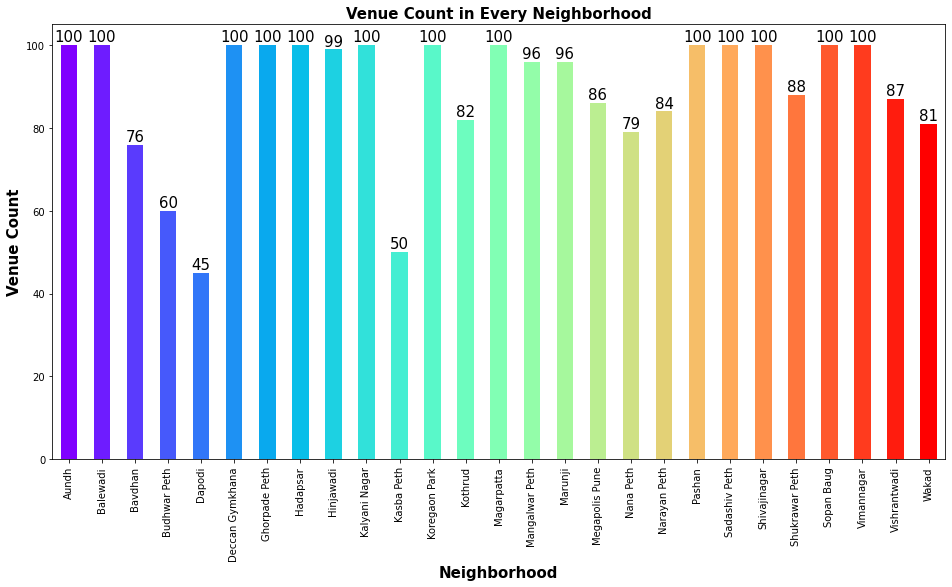

In [22]:

colors = iter(cm.rainbow(np.linspace(0, 1, len(pune_grouped.index))))
#pune_grouped['Venue Category'].plot(kind='pie',figsize=(16,12),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,pctdistance=1.12)
plots=pune_grouped['Venue Category'].plot(kind='bar',figsize=(16,8),color=colors)
plt.title('Venue Count in Every Neighborhood',fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlabel('Neighborhood',fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('Venue Count',fontdict={'fontsize':15,'fontweight':'bold'})
# Iterrating over the bars one-by-one 
for bar in plots.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(bar.get_height(), ''),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()),ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 

<p>From the figure we can see many of the neighbourhood have 100 venues, so I analysedthe single neighbourhood which have 100 venues. The reason for choosing the neighbourhood having 100 venues is there will be more number of categories to find.</p>

### But First Let's Visulize the Hijawadi Neighborhood

In [23]:
Hinjawadi=pune_venues[['Neighborhood','Venue Category','Venue']][pune_venues['Neighborhood']=='Hinjawadi'].groupby('Venue Category').count()
Hinjawadi.drop('Neighborhood',axis=1,inplace=True)

In [24]:
def count_explode(c):
    if(c>=5):
        return 0.3
    else:
        return 0

In [25]:
Hinjawadi['Explode']=Hinjawadi['Venue'].apply(count_explode)

Text(0.5, 1.12, 'Venue Count in Hinjawadi')

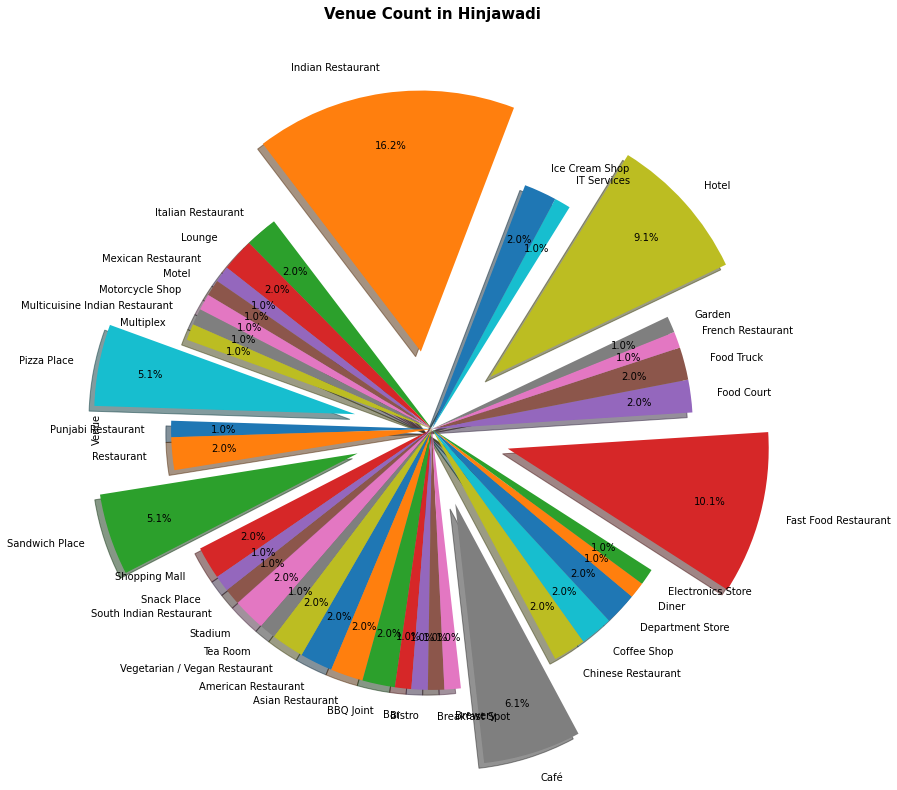

In [26]:
explode_list=Hinjawadi['Explode'].tolist()
Hinjawadi['Venue'].plot(kind='pie',figsize=(15,12),startangle=240,autopct='%1.1f%%',shadow=True,pctdistance=0.8,explode=explode_list)
plt.title('Venue Count in Hinjawadi',fontdict={'fontsize':15,'fontweight':'bold'},y=1.12)

### Observation from graph

<ol><li>Most Common venue is <strong>Indian Restaurant</strong></li>
    <li>Then <strong>Fast Food Restaurant</strong> followed by <strong>Pizza place</strong> and <strong>Sandwich Place</strong> </li>
    </ol>

### Let's Visulize the Pashan Now

Text(0.5, 1.1, 'Venues in Pashan')

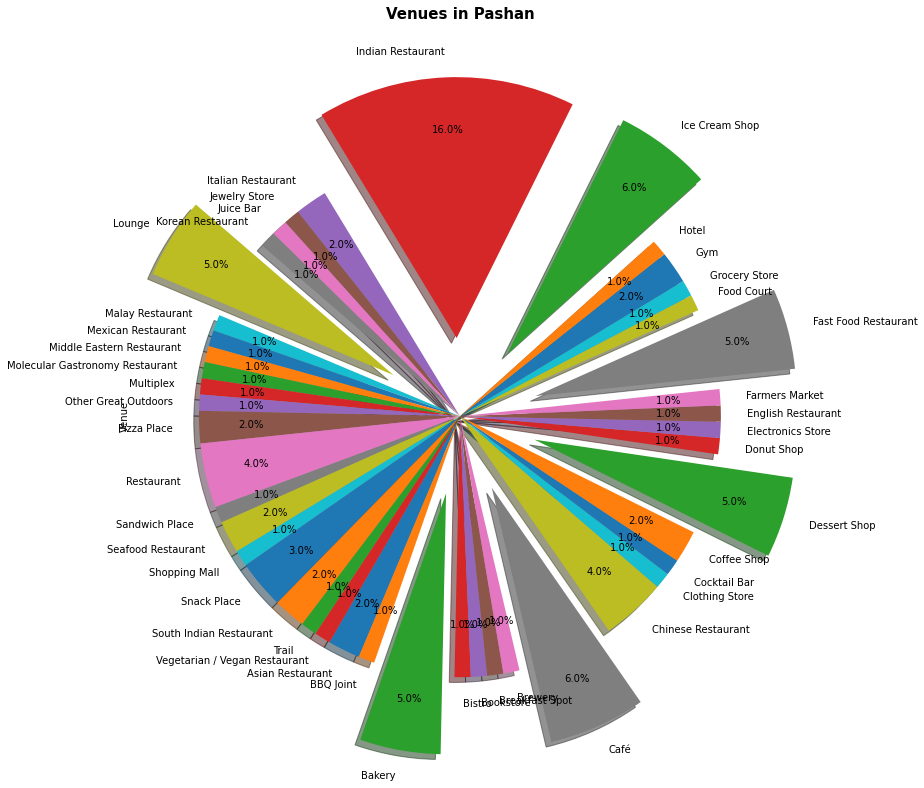

In [27]:
Pashan=pune_venues[['Neighborhood','Venue Category','Venue']][pune_venues['Neighborhood']=='Pashan'].groupby('Venue Category').count()
Pashan.drop('Neighborhood',axis=1,inplace=True) #making the dataframe

Pashan['Explode']=Pashan['Venue'].apply(count_explode) #will be used to make slice 

explode_list=Pashan['Explode'].tolist() #
Pashan['Venue'].plot(kind='pie',figsize=(15,12),startangle=240,autopct='%1.1f%%',shadow=True,pctdistance=0.8,explode=explode_list)
plt.title('Venues in Pashan',fontdict={'fontsize':15,'fontweight':'bold'},y=1.10)

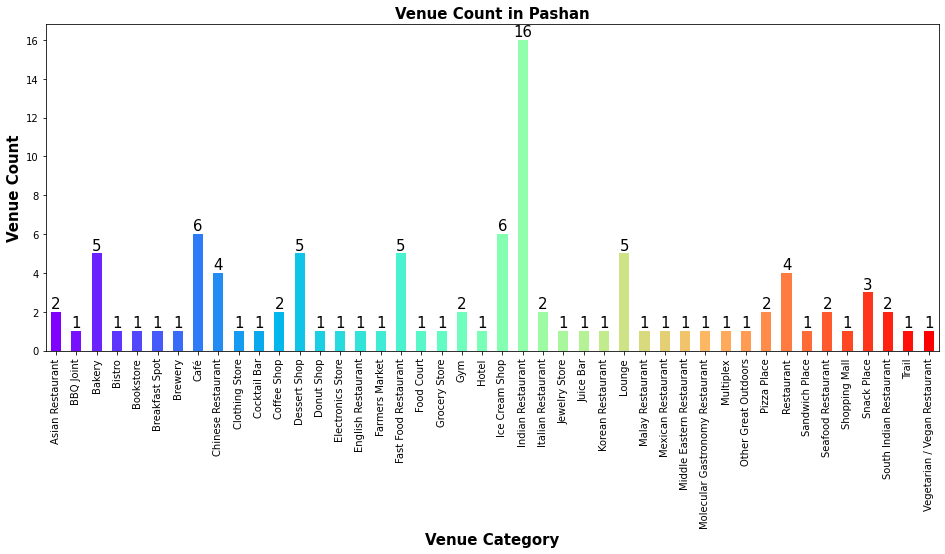

In [28]:

colors = iter(cm.rainbow(np.linspace(0, 1, len(Pashan.index))))
#pune_grouped['Venue Category'].plot(kind='pie',figsize=(16,12),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,pctdistance=1.12)
plots=Pashan['Venue'].plot(kind='bar',figsize=(16,6),color=colors)
plt.title('Venue Count in Pashan',fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlabel('Venue Category',fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('Venue Count',fontdict={'fontsize':15,'fontweight':'bold'})
# Iterrating over the bars one-by-one 
for bar in plots.patches: 
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(bar.get_height(), ''),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()),ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 

<p> Looks like in Pashan also <strong>Indian Restaurant</strong> is common.</p>
<p>But there are Multiple <strong>Multicuisine Restaurant</strong>,so if you are the person who likes to try diffrent cuisine Pashan neighborhood would be the best place for you.</p> 

### Let's convert all the 'Venue Category' to dummy varaible

In [29]:
# create a new dataframe by converting 'Venue Category' value to dummy values
pune_onehot = pd.get_dummies(pune_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to 'pune_onehot' dataframe from 'pune_venues'
pune_onehot['Neighborhood'] = pune_venues['Neighborhood'] 

# move neighborhood column to the first column
#['Added']+list(pune_onehot.columns[:]) # will add a news column at the begining of the list
fixed_columns = [pune_onehot.columns[-1]] + list(pune_onehot.columns[:-1])
pune_onehot = pune_onehot[fixed_columns]

pune_onehot.head()

Neighborhood  Airport Service  American Restaurant  Asian Restaurant  \
0        Aundh                0                    0                 0   
1        Aundh                0                    0                 0   
2        Aundh                0                    0                 0   
3        Aundh                0                    0                 0   
4        Aundh                0                    0                 0   

   Athletics & Sports  BBQ Joint  Bakery  Bank  Bar  Beach Bar  ...  Tea Room  \
0                   0          0       0     0    0          0  ...         0   
1                   0          0       0     0    0          0  ...         0   
2                   0          0       0     0    0          0  ...         0   
3                   0          0       0     0    0          0  ...         0   
4                   0          0       0     0    0          0  ...         0   

   Tex-Mex Restaurant  Thai Restaurant  Theater  Theme Park  Trail  \
0                   0                0        0           0      0   
1                   0                0        0           0      0   
2                   0                0        0           0      0   
3                   0                0        0           0      0   
4                   0                0        0           0      0   

   Train Station  Vegetarian / Vegan Restaurant  Women's Store  Yoga Studio  
0              0                              0              0            0  
1              0                              0              0            0  
2              0                              0              0            0  
3              0                              0              0            0  
4              0                              0              0            0  

[5 rows x 144 columns]

In [103]:
pune_group=pune_onehot.groupby('Neighborhood').mean().reset_index()
pune_group.head()

Neighborhood  Airport Service  American Restaurant  Asian Restaurant  \
0         Aundh              0.0                 0.00          0.010000   
1      Balewadi              0.0                 0.02          0.010000   
2       Bavdhan              0.0                 0.00          0.025316   
3  Budhwar Peth              0.0                 0.00          0.000000   
4        Dapodi              0.0                 0.00          0.000000   

   BBQ Joint  Badminton Court    Bakery       Bar  Beach Bar  Bed & Breakfast  \
0   0.010000         0.000000  0.040000  0.000000        0.0         0.000000   
1   0.010000         0.000000  0.000000  0.010000        0.0         0.000000   
2   0.012658         0.012658  0.037975  0.012658        0.0         0.000000   
3   0.000000         0.000000  0.017857  0.000000        0.0         0.017857   
4   0.000000         0.000000  0.061224  0.000000        0.0         0.000000   

   ...  Tex-Mex Restaurant  Thai Restaurant   Theater  Theme Park  \
0  ...                 0.0             0.01  0.000000         0.0   
1  ...                 0.0             0.00  0.000000         0.0   
2  ...                 0.0             0.00  0.012658         0.0   
3  ...                 0.0             0.00  0.017857         0.0   
4  ...                 0.0             0.00  0.000000         0.0   

   Toy / Game Store  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0               0.0    0.0           0.01                       0.010000   
1               0.0    0.0           0.00                       0.000000   
2               0.0    0.0           0.00                       0.000000   
3               0.0    0.0           0.00                       0.089286   
4               0.0    0.0           0.00                       0.020408   

   Women's Store  Yoga Studio  
0            0.0          0.0  
1            0.0          0.0  
2            0.0          0.0  
3            0.0          0.0  
4            0.0          0.0  

[5 rows x 143 columns]

#### Let's find top 5 venues in every neighborhood

In [104]:
num_top_venues = 5
for hood in pune_group['Neighborhood']:
    print("----"+hood+"----")
    temp = pune_group[pune_group['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aundh----
               venue  freq
0  Indian Restaurant  0.16
1               Café  0.06
2         Restaurant  0.05
3     Ice Cream Shop  0.05
4       Dessert Shop  0.04


----Balewadi----
                  venue  freq
0     Indian Restaurant  0.18
1                 Hotel  0.08
2                  Café  0.08
3  Fast Food Restaurant  0.08
4        Sandwich Place  0.05


----Bavdhan----
                  venue  freq
0     Indian Restaurant  0.14
1                  Café  0.10
2           Coffee Shop  0.08
3  Fast Food Restaurant  0.06
4          Dessert Shop  0.04


----Budhwar Peth----
                           venue  freq
0              Indian Restaurant  0.18
1                    Snack Place  0.09
2  Vegetarian / Vegan Restaurant  0.09
3             Seafood Restaurant  0.07
4                 Ice Cream Shop  0.05


----Dapodi----
                venue  freq
0   Indian Restaurant  0.18
1  Chinese Restaurant  0.06
2      Ice Cream Shop  0.06
3              Bakery  0.06
4        Dess

In [107]:
#let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [108]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pune_group['Neighborhood']

for ind in np.arange(pune_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pune_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Aundh     Indian Restaurant                  Café   
1      Balewadi     Indian Restaurant  Fast Food Restaurant   
2       Bavdhan     Indian Restaurant                  Café   
3  Budhwar Peth     Indian Restaurant           Snack Place   
4        Dapodi     Indian Restaurant        Ice Cream Shop   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Ice Cream Shop            Restaurant  Fast Food Restaurant   
1                           Café                 Hotel        Sandwich Place   
2                    Coffee Shop  Fast Food Restaurant                Bakery   
3  Vegetarian / Vegan Restaurant    Seafood Restaurant          Dessert Shop   
4                         Bakery    Chinese Restaurant                   Gym   

  6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
0                Lounge             Dessert Shop                Bakery   
1                Lounge  South Indian Restaurant           Pizza Place   
2          Dessert Shop           Sandwich Place    Chinese Restaurant   
3        Ice Cream Shop     Fast Food Restaurant              Tea Room   
4  Fast Food Restaurant              Snack Place                  Café   

  9th Most Common Venue 10th Most Common Venue  
0           Snack Place            Bus Station  
1    Chinese Restaurant         Ice Cream Shop  
2                Lounge            Snack Place  
3           Coffee Shop      Convenience Store  
4           Coffee Shop           Dessert Shop

### Let's use the Kmeans cluster to clusters all the Neighborhood

In [109]:
from sklearn.cluster import KMeans
pune_group_clustering = pune_group.drop('Neighborhood', 1)
k=6 # we want 6 cluster
kmean=KMeans(n_clusters=k,random_state=0)
kmean.fit(pune_group_clustering)
kmean.labels_[0:10]

array([2, 3, 2, 1, 2, 5, 5, 0, 3, 0])

Add the Cluster Column with labels value

In [110]:
neighborhoods_venues_sorted.insert(0,'Clusters',kmean.labels_)
neighborhoods_venues_sorted.head()

Clusters  Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         2         Aundh     Indian Restaurant                  Café   
1         3      Balewadi     Indian Restaurant  Fast Food Restaurant   
2         2       Bavdhan     Indian Restaurant                  Café   
3         1  Budhwar Peth     Indian Restaurant           Snack Place   
4         2        Dapodi     Indian Restaurant        Ice Cream Shop   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Ice Cream Shop            Restaurant  Fast Food Restaurant   
1                           Café                 Hotel        Sandwich Place   
2                    Coffee Shop  Fast Food Restaurant                Bakery   
3  Vegetarian / Vegan Restaurant    Seafood Restaurant          Dessert Shop   
4                         Bakery    Chinese Restaurant                   Gym   

  6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
0                Lounge             Dessert Shop                Bakery   
1                Lounge  South Indian Restaurant           Pizza Place   
2          Dessert Shop           Sandwich Place    Chinese Restaurant   
3        Ice Cream Shop     Fast Food Restaurant              Tea Room   
4  Fast Food Restaurant              Snack Place                  Café   

  9th Most Common Venue 10th Most Common Venue  
0           Snack Place            Bus Station  
1    Chinese Restaurant         Ice Cream Shop  
2                Lounge            Snack Place  
3           Coffee Shop      Convenience Store  
4           Coffee Shop           Dessert Shop

In [142]:
pune_merged = pune_venues  #merger with neighborhoods_venues_sorted 

# merge pune_grouped with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
pune_merged = pune_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
pune_merged.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Aundh              18.561883               73.810196   
1        Aundh              18.561883               73.810196   
2        Aundh              18.561883               73.810196   
3        Aundh              18.561883               73.810196   
4        Aundh              18.561883               73.810196   

               Venue  Venue Latitude  Venue Longitude      Venue Category  \
0         Crosswords       18.556177        73.809131           Bookstore   
1       Westend mall       18.561814        73.807220       Shopping Mall   
2          Yolkshire       18.553576        73.806888  English Restaurant   
3          Starbucks       18.556595        73.809153         Coffee Shop   
4  Naturals Icecream       18.556192        73.809169      Ice Cream Shop   

   Clusters 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0         2     Indian Restaurant                  Café        Ice Cream Shop   
1         2     Indian Restaurant                  Café        Ice Cream Shop   
2         2     Indian Restaurant                  Café        Ice Cream Shop   
3         2     Indian Restaurant                  Café        Ice Cream Shop   
4         2     Indian Restaurant                  Café        Ice Cream Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Restaurant  Fast Food Restaurant                Lounge   
1            Restaurant  Fast Food Restaurant                Lounge   
2            Restaurant  Fast Food Restaurant                Lounge   
3            Restaurant  Fast Food Restaurant                Lounge   
4            Restaurant  Fast Food Restaurant                Lounge   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0          Dessert Shop                Bakery           Snack Place   
1          Dessert Shop                Bakery           Snack Place   
2          Dessert Shop                Bakery           Snack Place   
3          Dessert Shop                Bakery           Snack Place   
4          Dessert Shop                Bakery           Snack Place   

  10th Most Common Venue  
0            Bus Station  
1            Bus Station  
2            Bus Station  
3            Bus Station  
4            Bus Station

In [164]:
# creating the color code  of all clusters
def color(i):
    if(i==0):
        return 'orange'
    elif(i==1):
        return 'green'
    elif(i==2):
        return 'beige'
    elif(i==3):
        return 'red'
    elif(i==4):
        return 'blue'
    elif(i==5):
        return 'purple'
    else:
        return None
pune_merged['Colors']=pune_merged['Clusters'].apply(color)

In [165]:
# finnaly create a map
address="Pune,IN"
g=Nominatim(user_agent="Japan")
l=g.geocode(address)
lat=l.latitude
lon=l.longitude
print('Pune:{},{}'.format(lat,lon))
map_clusters = folium.Map(location=[lat, lon], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, name, cluster,c,cat in zip(pune_merged['Venue Latitude'], pune_merged['Venue Longitude'], pune_merged['Venue'], pune_merged['Clusters'],pune_merged['Colors'],pune_merged['Venue Category']):
    label ='{},{},{}'.format(name,cat,cluster)
    folium.Marker(
        [lat, lon],
        popup=label,
        icon=folium.Icon(color=c,icon='info-sign')).add_to(map_clusters)
       
map_clusters

Pune:18.521428,73.8544541


## Analyze the clusters

In [176]:
# finding the most common vanues in all clusters
cluster=pune_merged['Clusters'].value_counts().index.tolist()
for c in cluster:
    common=pune_merged[pune_merged['Clusters']==c]['1st Most Common Venue'].value_counts().reset_index().values.tolist()[0][0]
    print()
    print('Most Comon venue in Clusters {} is {}'.format(c,common))


Most Comon venue in Clusters 2 is Indian Restaurant

Most Comon venue in Clusters 5 is Indian Restaurant

Most Comon venue in Clusters 3 is Indian Restaurant

Most Comon venue in Clusters 0 is Indian Restaurant

Most Comon venue in Clusters 1 is Indian Restaurant

Most Comon venue in Clusters 4 is Indian Restaurant


In [177]:
# finding the least common vanues in all clusters
for c in cluster:
    common=pune_merged[pune_merged['Clusters']==c]['10th Most Common Venue'].value_counts().reset_index().values.tolist()[0][0]
    print()
    print('Least Comon  Clusters {} is {} '.format(c,common))


Least Comon  Clusters 2 is Snack Place 

Least Comon  Clusters 5 is Seafood Restaurant 

Least Comon  Clusters 3 is Ice Cream Shop 

Least Comon  Clusters 0 is Chinese Restaurant 

Least Comon  Clusters 1 is Ice Cream Shop 

Least Comon  Clusters 4 is Italian Restaurant 


#### Finding the most common venues in all Neighborhood

In [178]:
c=neighborhoods['Neighbourhoods'].value_counts().index.tolist()
for n in c:
    v=pune_merged[pune_merged['Neighborhood']==n]['1st Most Common Venue'].value_counts().reset_index().values.tolist()[0][0]
    print()
    print('Most Common venues in {} is {}.'.format(n,v))


Most Common venues in Kasba Peth is Indian Restaurant.

Most Common venues in Kalyani Nagar is Café.

Most Common venues in Budhwar Peth is Indian Restaurant.

Most Common venues in Balewadi is Indian Restaurant.

Most Common venues in Nana Peth is Indian Restaurant.

Most Common venues in Pashan is Indian Restaurant.

Most Common venues in Kothrud is Indian Restaurant.

Most Common venues in Bavdhan is Indian Restaurant.

Most Common venues in Marunji is Indian Restaurant.

Most Common venues in Narayan Peth is Indian Restaurant.

Most Common venues in Magarpatta is Indian Restaurant.

Most Common venues in Hadapsar is Indian Restaurant.

Most Common venues in Hinjawadi is Indian Restaurant.

Most Common venues in Vimannagar is Indian Restaurant.

Most Common venues in Deccan Gymkhana is Indian Restaurant.

Most Common venues in Megapolis Pune is Indian Restaurant.

Most Common venues in Aundh is Indian Restaurant.

Most Common venues in Shivajinagar is Indian Restaurant.

Most Commo

In [179]:
c=neighborhoods['Neighbourhoods'].value_counts().index.tolist()
for n in c:
    v=pune_merged[pune_merged['Neighborhood']==n]['10th Most Common Venue'].value_counts().reset_index().values.tolist()[0][0]
    print()
    print('Least Common venues in {} is {}.'.format(n,v))


Least Common venues in Kasba Peth is Dessert Shop.

Least Common venues in Kalyani Nagar is Restaurant.

Least Common venues in Budhwar Peth is Convenience Store.

Least Common venues in Balewadi is Ice Cream Shop.

Least Common venues in Nana Peth is Maharashtrian Restaurant.

Least Common venues in Pashan is Snack Place.

Least Common venues in Kothrud is Fried Chicken Joint.

Least Common venues in Bavdhan is Snack Place.

Least Common venues in Marunji is Sandwich Place.

Least Common venues in Narayan Peth is Restaurant.

Least Common venues in Magarpatta is Chinese Restaurant.

Least Common venues in Hadapsar is Sandwich Place.

Least Common venues in Hinjawadi is Food Court.

Least Common venues in Vimannagar is Italian Restaurant.

Least Common venues in Deccan Gymkhana is Burger Joint.

Least Common venues in Megapolis Pune is Department Store.

Least Common venues in Aundh is Bus Station.

Least Common venues in Shivajinagar is Seafood Restaurant.

Least Common venues in Sad

### Finding the 5th Most Common Place

In [180]:
c=neighborhoods['Neighbourhoods'].value_counts().index.tolist()
for n in c:
    v=pune_merged[pune_merged['Neighborhood']==n]['5th Most Common Venue'].value_counts().reset_index().values.tolist()[0][0]
    print()
    print('5th Most Common venues in {} is {}.'.format(n,v))


5th Most Common venues in Kasba Peth is Hotel.

5th Most Common venues in Kalyani Nagar is Hotel.

5th Most Common venues in Budhwar Peth is Dessert Shop.

5th Most Common venues in Balewadi is Sandwich Place.

5th Most Common venues in Nana Peth is Fast Food Restaurant.

5th Most Common venues in Pashan is Bakery.

5th Most Common venues in Kothrud is Dessert Shop.

5th Most Common venues in Bavdhan is Bakery.

5th Most Common venues in Marunji is Snack Place.

5th Most Common venues in Narayan Peth is Tea Room.

5th Most Common venues in Magarpatta is Café.

5th Most Common venues in Hadapsar is Pub.

5th Most Common venues in Hinjawadi is Sandwich Place.

5th Most Common venues in Vimannagar is Pizza Place.

5th Most Common venues in Deccan Gymkhana is Fast Food Restaurant.

5th Most Common venues in Megapolis Pune is Sandwich Place.

5th Most Common venues in Aundh is Fast Food Restaurant.

5th Most Common venues in Shivajinagar is Multiplex.

5th Most Common venues in Sadashiv Pe

### 7th Most Common Place in all Neighborhood

In [181]:
c=neighborhoods['Neighbourhoods'].value_counts().index.tolist()
for n in c:
    v=pune_merged[pune_merged['Neighborhood']==n]['7th Most Common Venue'].value_counts().reset_index().values.tolist()[0][0]
    print()
    print('7th Most Common venues in {} is {}.'.format(n,v))


7th Most Common venues in Kasba Peth is Maharashtrian Restaurant.

7th Most Common venues in Kalyani Nagar is Nightclub.

7th Most Common venues in Budhwar Peth is Fast Food Restaurant.

7th Most Common venues in Balewadi is South Indian Restaurant.

7th Most Common venues in Nana Peth is Tea Room.

7th Most Common venues in Pashan is Lounge.

7th Most Common venues in Kothrud is Coffee Shop.

7th Most Common venues in Bavdhan is Sandwich Place.

7th Most Common venues in Marunji is Pizza Place.

7th Most Common venues in Narayan Peth is Café.

7th Most Common venues in Magarpatta is Restaurant.

7th Most Common venues in Hadapsar is Café.

7th Most Common venues in Hinjawadi is Department Store.

7th Most Common venues in Vimannagar is Department Store.

7th Most Common venues in Deccan Gymkhana is Restaurant.

7th Most Common venues in Megapolis Pune is Pizza Place.

7th Most Common venues in Aundh is Dessert Shop.

7th Most Common venues in Shivajinagar is Vegetarian / Vegan Restau

In [192]:
h=pune_merged[pune_merged['Neighborhood']=='Hinjawadi']['4th Most Common Venue'].value_counts().reset_index().values.tolist()[0][0]
print()
print('4th Most Common venues in {} is {}.'.format('Hinjawadi',h))


4th Most Common venues in Hinjawadi is Café.


In [139]:
pashan_venue=pune_merged[pune_merged['Neighborhood']=='Pashan']
la=b.iloc[0]['Latitude']
lo=b.iloc[0]['Longitude']
la,lo

pashan_map=folium.Map(location=[la,lo],zoom_start=12)
for lat,lon,name,cluster,c in zip(pashan_venue['Venue Latitude'],pashan_venue['Venue Longitude'],pashan_venue['Venue'],pashan_venue['Clusters'],pashan_venue['Colors']):
    label='{},{}'.format(name,cluster)
    folium.Marker([lat,lon],popup=label,icon=folium.Icon(color=c,icon='info-sign')).add_to(pashan_map)
pashan_map
    

## Conclusion

<p>Based on the result above, in all clusters Indian Restaurantis the most common followed by Fast-food. So, if you like to open any business you certainly don’t want to open an Indian restaurantspecifically in neighbourhood which have 100 venues unless you have a backup budget.You can think of a businesswhich is neither least common nor most common in any of the neighbourhood, for example in Hinjewadi Most Common venue is Indian Restaurant and the lest common venue is a food court, reason may be because there are multiple Restaurant present in the area.But A Café, Sandwich place and a Pizza Place are neither most common nor least common, soopening a Sandwich place or a Café place might be a good idea.</p>